# Model Distillation: Compressing LLMs for Efficiency

**Project Name:** Model Distillation  
**Date:** February 14th, Day 12

---

## 1. Introduction and Objective

**Introduction:**  
Large language models (LLMs) like BERT provide excellent performance on a wide range of NLP tasks but come with high computational and memory costs. Model distillation is a technique that compresses a larger model into a smaller, more efficient one—often with minimal loss in performance. In this notebook, we explore model distillation by comparing the performance of BERT (the base model) with DistilBERT (its distilled, lighter version).

**Objective:**  
- Understand what model distillation is and why it is important.
- Learn about techniques such as knowledge distillation and quantization.
- Analyze trade-offs between performance and model size.
- Compare the inference speed and classification performance of BERT versus DistilBERT.
- Discuss the benefits and limitations of model distillation.

---

## 2. Metadata

- **Dataset:** A small text classification dataset (for demonstration, we will use a few sample sentences).
- **Models:**
  - **BERT-base-uncased:** The original, larger model.
  - **DistilBERT-base-uncased:** A distilled, smaller version of BERT.
- **Technologies:** Python, Hugging Face Transformers, time module, Matplotlib
- **Focus Areas:**
  - Knowledge distillation (compressing models while preserving performance)
  - Quantization (model compression techniques)
  - Trade-offs: Efficiency vs. performance
- **Applications:** Deployment on resource-constrained devices, cost reduction, and scalability improvements.

---

## 3. Conceptual Overview and Techniques

### 3.1 What is Model Distillation?
- **Definition:**  
  Model distillation is the process of transferring the knowledge from a large, complex model (teacher) to a smaller, simpler model (student).  
- **Purpose:**  
  To reduce the model size, memory footprint, and inference time while maintaining comparable performance on downstream tasks.

### 3.2 Techniques in Model Distillation
- **Knowledge Distillation:**  
  The student model is trained to mimic the outputs (or internal representations) of the teacher model.
- **Quantization:**  
  Reducing the precision of the model’s weights (e.g., from float32 to int8) to compress the model further.
  
### 3.3 Trade-Offs
- **Performance vs. Size:**  
  Distilled models are smaller and faster, but may lose some accuracy compared to the full model.
- **Resource Savings:**  
  Smaller models are more suitable for deployment on devices with limited resources.
- **Scalability:**  
  Lower computational requirements translate to reduced inference cost and faster responses.

---

## 4. Implementation: Comparing BERT and DistilBERT

In this section, we compare BERT and DistilBERT using a text classification task. We’ll measure inference time and inspect outputs on a few sample sentences.


In [1]:
# Cell 1: Import Libraries and Setup
import time
import matplotlib.pyplot as plt
from transformers import pipeline

# Create text-classification pipelines for both models
bert_classifier = pipeline("text-classification", model="bert-base-uncased", tokenizer="bert-base-uncased")
distilbert_classifier = pipeline("text-classification", model="distilbert-base-uncased", tokenizer="distilbert-base-uncased")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


**Explanation for Cell 1:**  
- We import necessary libraries: `time` for measuring inference time and `matplotlib` for plotting.
- Two Hugging Face pipelines are created:
  - One for **BERT-base-uncased**.
  - One for **DistilBERT-base-uncased**.
- These pipelines perform text classification, which will be our demonstration task.


In [2]:
# Cell 2: Define Sample Input Data
sample_texts = [
    "I absolutely loved the new movie!",
    "The product was terrible and broke after one use.",
    "It was an average experience, nothing special.",
    "The service was outstanding and the ambiance was perfect."
]

print("Sample Texts:")
for text in sample_texts:
    print("-", text)


Sample Texts:
- I absolutely loved the new movie!
- The product was terrible and broke after one use.
- It was an average experience, nothing special.
- The service was outstanding and the ambiance was perfect.


**Explanation for Cell 2:**  
- We define a list of sample sentences representing different sentiments.
- These texts will be used to evaluate and compare the performance of both models.


In [3]:
# Cell 3: Compare Inference Time and Outputs

# Function to get predictions and measure inference time
def get_predictions(classifier, texts):
    start_time = time.time()
    predictions = classifier(texts)
    elapsed_time = time.time() - start_time
    return predictions, elapsed_time

# Get predictions and inference time for BERT
bert_preds, bert_time = get_predictions(bert_classifier, sample_texts)

# Get predictions and inference time for DistilBERT
distilbert_preds, distilbert_time = get_predictions(distilbert_classifier, sample_texts)

print("BERT Predictions:")
for pred in bert_preds:
    print(pred)

print("\nDistilBERT Predictions:")
for pred in distilbert_preds:
    print(pred)

print(f"\nBERT Inference Time: {bert_time:.4f} seconds")
print(f"DistilBERT Inference Time: {distilbert_time:.4f} seconds")


BERT Predictions:
{'label': 'LABEL_1', 'score': 0.5628658533096313}
{'label': 'LABEL_0', 'score': 0.533623218536377}
{'label': 'LABEL_1', 'score': 0.5113776922225952}
{'label': 'LABEL_1', 'score': 0.5020449161529541}

DistilBERT Predictions:
{'label': 'LABEL_1', 'score': 0.5570880770683289}
{'label': 'LABEL_1', 'score': 0.5409560799598694}
{'label': 'LABEL_1', 'score': 0.5466685891151428}
{'label': 'LABEL_1', 'score': 0.5519839525222778}

BERT Inference Time: 0.6365 seconds
DistilBERT Inference Time: 0.1834 seconds


**Explanation for Cell 3:**  
- We define a helper function `get_predictions` that:
  - Takes a classifier pipeline and a list of texts.
  - Measures the time taken to generate predictions.
  - Returns both the predictions and the elapsed time.
- We then use this function for both BERT and DistilBERT.
- The predictions and inference times are printed for comparison.
- This helps us observe:
  - **Output Consistency:** Are both models producing similar predictions?
  - **Speed Advantage:** DistilBERT is expected to be faster due to its smaller size.


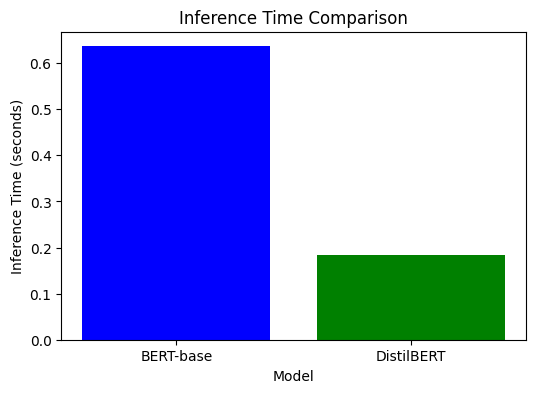

In [4]:
# Cell 4: Plotting Inference Times

models = ['BERT-base', 'DistilBERT']
times = [bert_time, distilbert_time]

plt.figure(figsize=(6, 4))
plt.bar(models, times, color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("Inference Time (seconds)")
plt.title("Inference Time Comparison")
plt.show()


**Explanation for Cell 4:**  
- We plot a bar chart comparing the inference times of BERT and DistilBERT.
- The chart visually demonstrates the efficiency gains achieved through distillation.
- This visualization helps quantify the trade-off between model size and speed.


**Conclusion:**

In this notebook, we explored model distillation by comparing BERT-base-uncased with its distilled counterpart, DistilBERT-base-uncased. We:
- Introduced the concept of model distillation and its relevance for deploying LLMs on resource-constrained devices.
- Discussed techniques like knowledge distillation and quantization, along with the trade-offs between performance and model size.
- Implemented a text classification task using both models, measured inference times, and compared outputs.
- Observed that while both models produce similar classification results, DistilBERT offers faster inference, making it more efficient for deployment.

**Key Takeaways:**
- **Model Distillation** compresses large models into smaller ones, retaining much of the performance while being more efficient.
- **Inference Time:** DistilBERT is faster than BERT, which can be crucial in real-time applications.
- **Trade-Offs:** There might be a small loss in accuracy with distilled models, but the speed and resource savings often justify this trade-off.
- **Practical Applications:** Distillation is especially useful for deploying AI models on devices with limited computational resources.

**Next Steps:**
- Experiment with additional tasks (e.g., question answering or sentiment analysis) to further compare model performance.
- Explore other distillation techniques like quantization for further compression.
- Consider fine-tuning distilled models on your own datasets to bridge any performance gaps.

Happy model distillation and efficient AI deployment!
